# Extract image color
## reference
- [Image Color Extraction with Python in 4 Steps | by Boriharn K | Towards Data Science](https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e)
- [Basic image processing (aiismath.com)](https://www.aiismath.com/pages/c_02a_basic_image_processing/hsv_nb/)

In [2]:
#!pip install easydev                 #version 0.12.0
#!pip install colormap                #version 1.0.4
#!pip install opencv-python           #version 4.5.5.64
#!pip install colorgram.py            #version 1.2.0
#!pip install extcolors               #version 1.0.0

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import cv2
import extcolors

from colormap import rgb2hex

In [9]:
all_color_ls = list(matplotlib.colors.cnames.values())
len(all_color_ls)

148

In [5]:
img_url = "image/0d9eac13-87b6-4449-98cb-59d3ccaedbc3.jpg"
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((62, 77, 18), 620852),
  ((162, 169, 177), 347596),
  ((19, 35, 0), 277538),
  ((14, 14, 14), 130383),
  ((59, 73, 37), 63893),
  ((87, 102, 59), 43627),
  ((87, 103, 30), 39214),
  ((122, 119, 86), 34350),
  ((34, 51, 0), 31852),
  ((29, 33, 19), 20766),
  ((57, 61, 44), 12367),
  ((153, 150, 115), 9317)],
 1671000)

In [6]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                    int(i.split(", ")[1]),
                    int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])

    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#3E4D12,620852
1,#A2A9B1,347596
2,#132300,277538
3,#0E0E0E,130383
4,#3B4925,63893
5,#57663B,43627
6,#57671E,39214
7,#7A7756,34350
8,#223300,31852
9,#1D2113,20766


In [38]:
def exact_color(input_image, output_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108), dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)

    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = input_image.replace(".jpg", "_resize.jpg")
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                            labels= text_c,
                            labeldistance= 1.05,
                            colors = list_color,
                            textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()

    plt.savefig(output_image)

    return plt.show()

In [42]:
output_name = img_url.replace('.jpg', '_t5.jpg')
exact_color(img_url, output_name, 1500, 5, 1)

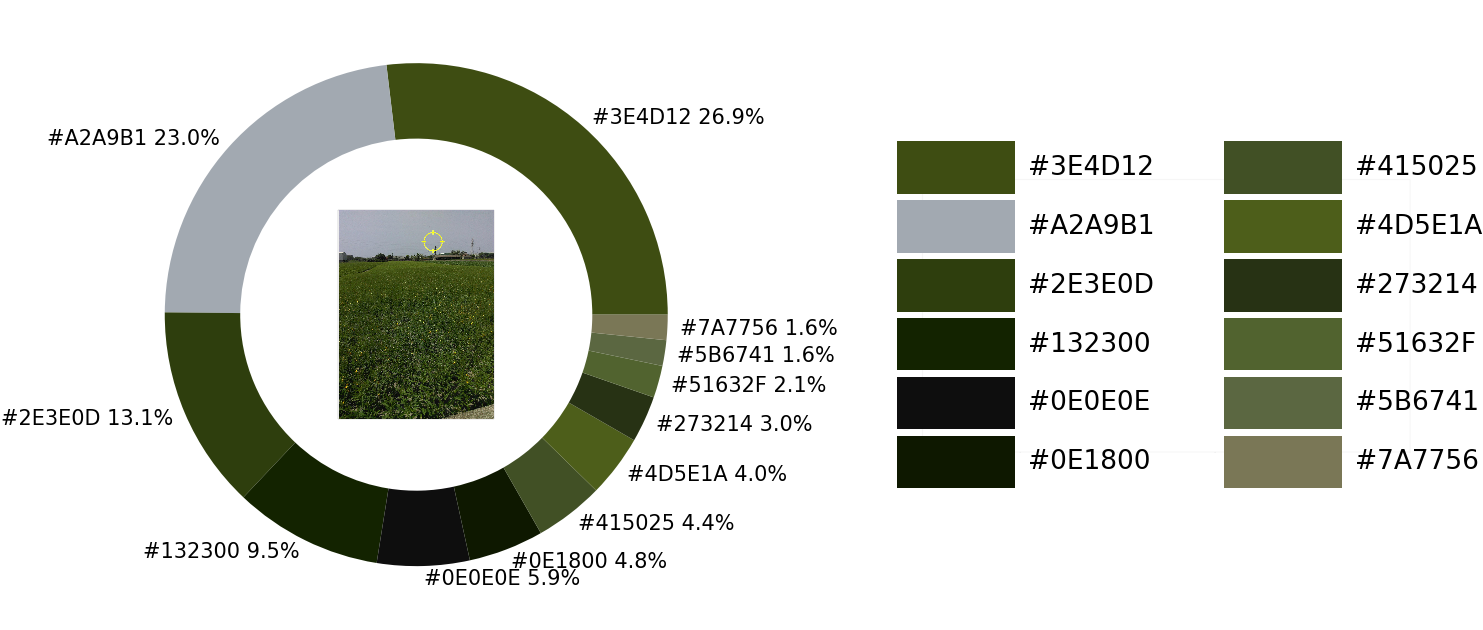

In [39]:
output_name = img_url.replace('.jpg', '_t8.jpg')
exact_color(img_url, output_name, 1500, 8, 1)

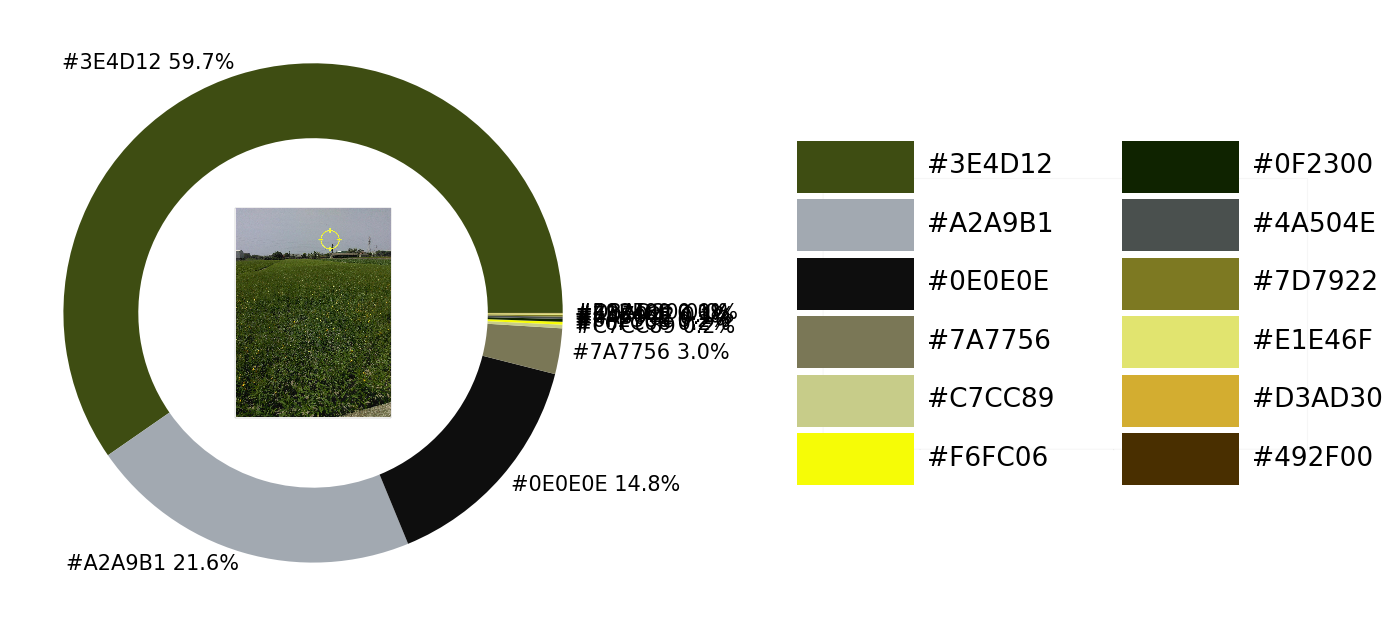

In [41]:
output_name = img_url.replace('.jpg', '_t24.jpg')
exact_color(img_url, output_name, 1500, 24, 1)